<a href="https://colab.research.google.com/github/bharath31793/language_modeling/blob/main/Byte_pair_encoding_telugu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
__author__ = "Bharath Gogineni"
__version__ = "1.0.0"
__status__ = "Development"

In [2]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [9]:
# prompt: from the files, import and unzip the telugu_books.zip file and load the data into a pandas data frame and then create a input.txt file with content in text column of the csv file

!unzip telugu_books.zip

import pandas as pd

# Assuming the zip file contains a single CSV file, and its name is something like 'telugu_books_data.csv'
# If the filename is different, replace 'telugu_books_data.csv' with the actual filename.
# You might need to list the contents of the unzipped directory to find the exact filename.
# !ls
df = pd.read_csv('telugu_books.csv')

df= df.head(520)

# Assuming the column containing the text content is named 'text'
# If the column name is different, replace 'text' with the actual column name.
text_content = df['text'].str.cat(sep='\n')

with open('input.txt', 'w') as f:
    f.write(text_content)

print("Data loaded into pandas DataFrame and text content written to input.txt")

Archive:  telugu_books.zip
replace telugu_books.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: telugu_books.csv        
Data loaded into pandas DataFrame and text content written to input.txt


In [10]:
# read it in to inspect it
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [32]:
print("length of dataset in characters: ", len(text))

length of dataset in characters:  2466795


In [35]:
# let's look at the first 1000 characters
print(text[:1000])


    సుశీలమ్మ కళ్ళలో భయం పారాడింది.
    "అనాధ బిడ్డ అని చిన్నప్పుడే తెలిస్తే మన దగ్గిరవాడు అలా అరమరిక లేకుండా చనువుగా పెరిగేవాడా?" పుట్టెడు దిగులు సుశీలమ్మ కంఠంలో పలికింది.
    "అది మనం పెంచేదాన్ని బట్టి వుంటుంది. అటువంటి బేధాలు మనలో లేనట్టు తెలుసుకొనేలా పెంచాలి."
    "చాలామంది అలాగే పెంచుతారు గదండీ."
    "ఏనాడో ఒకనాడు ఆ విషయం తెలియకపోదు. మనం పట్నంలో వుంటున్నాం గనక యింత కాలమయినా ఈ రహస్యాన్ని దాచగలిగాం.
    సుశీలమ్మ వింటూ కూర్చుంది.
    "ఒక వ్యక్తిత్వం అంటూ ఏర్పడ్డాక ఆ రహస్యం తెలిస్తే లోతుగా గాయపడతారు. అనేక ఆలోచనలు వస్తాయి. చిన్నప్పుడే తెలిస్తే అంతగా తలక్రిందులై పోరు" అన్నాడు.  
    "వాడు మనల్ని వదిలేసి వెళ్ళిపోతాడేమో!" అనలేక అంటున్న ఆమె గొంతులో ఏదో అడ్డుపడినట్టు ఉక్కిరిబిక్కిరి అయిపోతుంది.
    రామనాథానికి కూడా ఆ భయం లేకపోలేదు.
    ఆ భయాన్ని దాచుకుంటూ వెళ్ళడు. ఎలా వెళతాడు? ఎక్కడికి వెళతాడు? అసలు ఎందుకు వెళ్ళాలి? వాడికి మనమేం తక్కువ చేశామని వెళ్తాడు?" అన్నాడు.
    సుశీలమ్మకు ఎక్కడికో లోతు తెలియని అగాధంలోకి పడుతున్న వ్యక్తికి జారుడుమెట్లు చేతికి అందినట్టు అనిపించింది.   
    "వాడు వెళ్ళిప

In [13]:
# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)


 !"'()*,-./0123456789:;=?ABCDEFGHIKLMNOPRSTUVWXYZ[]_`abcdefghijklmnopqrstuvwxyz| ఁంఃఅఆఇఈఉఊఋఎఏఐఒఓఔకఖగఘఙచఛజఝఞటఠడఢణతథదధనపఫబభమయరఱలళవశషసహాిీుూృౄెేైొోౌ్౦౧౨
150


In [14]:
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

print(encode("అందరికి నమస్కారం"))
print(decode(encode("అందరికి నమస్కారం")))

[85, 83, 115, 124, 134, 98, 134, 1, 117, 122, 131, 146, 98, 133, 124, 83]
అందరికి నమస్కారం


In [15]:
# let's now encode the entire text dataset and store it into a torch.Tensor
import torch # we use PyTorch: https://pytorch.org
data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape, data.dtype)
print(data[:1000]) # the 1000 characters we looked at earier will to the LLM look like this

torch.Size([2466795]) torch.int64
tensor([  0,  81,  81,   1,  81, 131, 136, 129, 135, 126, 122, 146, 122,   1,
         98, 127, 146, 127, 126, 144,   1, 121, 123,  83,   1, 118, 133, 124,
        133, 110, 134,  83, 115, 134,  10,   0,  81,  81,   1,  81,   3,  85,
        117, 133, 116,   1, 120, 134, 110, 146, 110,   1,  85, 117, 134,   1,
        103, 134, 117, 146, 117, 118, 146, 118, 136, 110, 141,   1, 113, 140,
        126, 134, 131, 146, 113, 141,   1, 122, 117,   1, 115, 100, 146, 100,
        134, 124, 128, 133, 110, 136,   1,  85, 126, 133,   1,  85, 124, 122,
        124, 134,  98,   1, 126, 141,  98, 136,  83, 110, 133,   1, 103, 117,
        136, 128, 136, 100, 133,   1, 118, 140, 124, 134, 100, 141, 128, 133,
        110, 133,  25,   3,   1, 118, 136, 108, 146, 108, 140, 110, 136,   1,
        115, 134, 100, 136, 126, 136,   1, 131, 136, 129, 135, 126, 122, 146,
        122,   1,  98,  83, 109,  83, 126, 144,   1, 118, 126, 134,  98, 134,
         83, 115, 134,  10,   

In [16]:
data = torch.tensor(encode("అందరు బాగున్నారా"), dtype=torch.long)
print(data.shape, data.dtype)
print(data)

torch.Size([16]) torch.int64
tensor([ 85,  83, 115, 124, 136,   1, 120, 133, 100, 136, 117, 146, 117, 133,
        124, 133])


In [23]:
#Lets look at the encodigs for different chars
ord("అ")

3077

In [24]:
ord("ద"), ord("😅"), ord("र")

(3110, 128517, 2352)

In [26]:
k = [ord(x) for x in "నేను తెలుగు నేర్చుకుందాం అనుకుంటున్నాను"]
k, len(k)

([3112,
  3143,
  3112,
  3137,
  32,
  3108,
  3142,
  3122,
  3137,
  3095,
  3137,
  32,
  3112,
  3143,
  3120,
  3149,
  3098,
  3137,
  3093,
  3137,
  3074,
  3110,
  3134,
  3074,
  32,
  3077,
  3112,
  3137,
  3093,
  3137,
  3074,
  3103,
  3137,
  3112,
  3149,
  3112,
  3134,
  3112,
  3137],
 39)

In [27]:
"నేను తెలుగు నేర్చుకుందాం అనుకుంటున్నాను".encode("utf-8")

b'\xe0\xb0\xa8\xe0\xb1\x87\xe0\xb0\xa8\xe0\xb1\x81 \xe0\xb0\xa4\xe0\xb1\x86\xe0\xb0\xb2\xe0\xb1\x81\xe0\xb0\x97\xe0\xb1\x81 \xe0\xb0\xa8\xe0\xb1\x87\xe0\xb0\xb0\xe0\xb1\x8d\xe0\xb0\x9a\xe0\xb1\x81\xe0\xb0\x95\xe0\xb1\x81\xe0\xb0\x82\xe0\xb0\xa6\xe0\xb0\xbe\xe0\xb0\x82 \xe0\xb0\x85\xe0\xb0\xa8\xe0\xb1\x81\xe0\xb0\x95\xe0\xb1\x81\xe0\xb0\x82\xe0\xb0\x9f\xe0\xb1\x81\xe0\xb0\xa8\xe0\xb1\x8d\xe0\xb0\xa8\xe0\xb0\xbe\xe0\xb0\xa8\xe0\xb1\x81'

In [28]:
l = list("నేను తెలుగు నేర్చుకుందాం అనుకుంటున్నాను".encode("utf-8"))
l, len(l)

([224,
  176,
  168,
  224,
  177,
  135,
  224,
  176,
  168,
  224,
  177,
  129,
  32,
  224,
  176,
  164,
  224,
  177,
  134,
  224,
  176,
  178,
  224,
  177,
  129,
  224,
  176,
  151,
  224,
  177,
  129,
  32,
  224,
  176,
  168,
  224,
  177,
  135,
  224,
  176,
  176,
  224,
  177,
  141,
  224,
  176,
  154,
  224,
  177,
  129,
  224,
  176,
  149,
  224,
  177,
  129,
  224,
  176,
  130,
  224,
  176,
  166,
  224,
  176,
  190,
  224,
  176,
  130,
  32,
  224,
  176,
  133,
  224,
  176,
  168,
  224,
  177,
  129,
  224,
  176,
  149,
  224,
  177,
  129,
  224,
  176,
  130,
  224,
  176,
  159,
  224,
  177,
  129,
  224,
  176,
  168,
  224,
  177,
  141,
  224,
  176,
  168,
  224,
  176,
  190,
  224,
  176,
  168,
  224,
  177,
  129],
 111)

In [29]:
l = list("నే".encode("utf-8"))
l, len(l)

([224, 176, 168, 224, 177, 135], 6)

In [30]:
k = lambda s: s**2
list(map(k, range(10)))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [37]:
#create tokens
new_text = text[:2000]
tokens = new_text.encode("utf-8") # raw bytes
tokens = list(map(int, tokens)) # convert to a list of integers in range 0..255 for convenience
print('---')
print(new_text)
print("length:", len(new_text))
print('---')
print(tokens)
print("length:", len(tokens))

---

    సుశీలమ్మ కళ్ళలో భయం పారాడింది.
    "అనాధ బిడ్డ అని చిన్నప్పుడే తెలిస్తే మన దగ్గిరవాడు అలా అరమరిక లేకుండా చనువుగా పెరిగేవాడా?" పుట్టెడు దిగులు సుశీలమ్మ కంఠంలో పలికింది.
    "అది మనం పెంచేదాన్ని బట్టి వుంటుంది. అటువంటి బేధాలు మనలో లేనట్టు తెలుసుకొనేలా పెంచాలి."
    "చాలామంది అలాగే పెంచుతారు గదండీ."
    "ఏనాడో ఒకనాడు ఆ విషయం తెలియకపోదు. మనం పట్నంలో వుంటున్నాం గనక యింత కాలమయినా ఈ రహస్యాన్ని దాచగలిగాం.
    సుశీలమ్మ వింటూ కూర్చుంది.
    "ఒక వ్యక్తిత్వం అంటూ ఏర్పడ్డాక ఆ రహస్యం తెలిస్తే లోతుగా గాయపడతారు. అనేక ఆలోచనలు వస్తాయి. చిన్నప్పుడే తెలిస్తే అంతగా తలక్రిందులై పోరు" అన్నాడు.  
    "వాడు మనల్ని వదిలేసి వెళ్ళిపోతాడేమో!" అనలేక అంటున్న ఆమె గొంతులో ఏదో అడ్డుపడినట్టు ఉక్కిరిబిక్కిరి అయిపోతుంది.
    రామనాథానికి కూడా ఆ భయం లేకపోలేదు.
    ఆ భయాన్ని దాచుకుంటూ వెళ్ళడు. ఎలా వెళతాడు? ఎక్కడికి వెళతాడు? అసలు ఎందుకు వెళ్ళాలి? వాడికి మనమేం తక్కువ చేశామని వెళ్తాడు?" అన్నాడు.
    సుశీలమ్మకు ఎక్కడికో లోతు తెలియని అగాధంలోకి పడుతున్న వ్యక్తికి జారుడుమెట్లు చేతికి అందినట్టు అనిపించింది.   
    "వాడు వెళ

In [38]:
#sample BP test
l = [1, 2, 3, 4, 5]
list(zip(l, l[1:]))

[(1, 2), (2, 3), (3, 4), (4, 5)]

In [41]:
#Pair
d = {(1, 2): 10, ('a', 'b'): 23, 3: (45, 56)}
d.get((1, 3), 0), d.get((4, 1), 0)

(0, 0)

In [44]:
def get_stats(ids):
    counts = {}
    for pair in zip(ids, ids[1:]): # Pythonic way to iterate consecutive elements
        counts[pair] = counts.get(pair, 0) + 1
    return counts

stats = get_stats(tokens)
# print(stats)
print(sorted(((v,k) for k,v in stats.items()), reverse=True))

[(1198, (224, 176)), (378, (224, 177)), (214, (32, 224)), (130, (176, 191)), (122, (177, 129)), (115, (176, 168)), (111, (176, 190)), (110, (177, 141)), (109, (168, 224)), (109, (141, 224)), (91, (190, 224)), (77, (191, 224)), (77, (176, 149)), (75, (176, 130)), (74, (194, 160)), (70, (176, 161)), (70, (149, 224)), (69, (161, 224)), (66, (176, 178)), (65, (178, 224)), (63, (129, 224)), (58, (130, 224)), (52, (176, 174)), (52, (176, 164)), (51, (164, 224)), (48, (176, 181)), (47, (181, 224)), (46, (176, 170)), (46, (176, 166)), (46, (170, 224)), (45, (177, 135)), (45, (174, 224)), (43, (166, 224)), (42, (129, 32)), (40, (176, 224)), (40, (176, 176)), (40, (176, 159)), (38, (159, 224)), (34, (191, 32)), (33, (176, 133)), (33, (133, 224)), (32, (134, 224)), (31, (177, 134)), (31, (176, 154)), (31, (154, 224)), (30, (177, 139)), (30, (135, 224)), (26, (176, 151)), (26, (151, 224)), (26, (32, 194)), (25, (160, 32)), (25, (130, 32)), (24, (184, 224)), (24, (176, 184)), (23, (160, 194)), (23,

In [42]:
top_pair = max(stats, key=stats.get)
top_pair

(224, 176)

In [43]:
chr(101), chr(32)

('e', ' ')

In [45]:
def merge(ids, pair, idx):
  # in the list of ints (ids), replace all consecutive occurences of pair with the new token idx
  newids = []
  i = 0
  while i < len(ids):
    # if we are not at the very last position AND the pair matches, replace it
    if i < len(ids) - 1 and ids[i] == pair[0] and ids[i+1] == pair[1]:
      newids.append(idx)
      i += 2
    else:
      newids.append(ids[i])
      i += 1
  return newids

print(merge([5, 6, 6, 7, 9, 1], (6, 7), 99))

tokens2 = merge(tokens, top_pair, 256)


print(tokens2)
print("length:", len(tokens2), len(tokens))

[5, 6, 99, 9, 1]
[10, 194, 160, 194, 160, 32, 194, 160, 256, 184, 224, 177, 129, 256, 182, 224, 177, 128, 256, 178, 256, 174, 224, 177, 141, 256, 174, 32, 256, 149, 256, 179, 224, 177, 141, 256, 179, 256, 178, 224, 177, 139, 32, 256, 173, 256, 175, 256, 130, 32, 256, 170, 256, 190, 256, 176, 256, 190, 256, 161, 256, 191, 256, 130, 256, 166, 256, 191, 46, 10, 194, 160, 194, 160, 32, 194, 160, 34, 256, 133, 256, 168, 256, 190, 256, 167, 32, 256, 172, 256, 191, 256, 161, 224, 177, 141, 256, 161, 32, 256, 133, 256, 168, 256, 191, 32, 256, 154, 256, 191, 256, 168, 224, 177, 141, 256, 168, 256, 170, 224, 177, 141, 256, 170, 224, 177, 129, 256, 161, 224, 177, 135, 32, 256, 164, 224, 177, 134, 256, 178, 256, 191, 256, 184, 224, 177, 141, 256, 164, 224, 177, 135, 32, 256, 174, 256, 168, 32, 256, 166, 256, 151, 224, 177, 141, 256, 151, 256, 191, 256, 176, 256, 181, 256, 190, 256, 161, 224, 177, 129, 32, 256, 133, 256, 178, 256, 190, 32, 256, 133, 256, 176, 256, 174, 256, 176, 256, 191, 256, 149,

In [46]:
def get_stats(ids):
    counts = {}
    for pair in zip(ids, ids[1:]):
        counts[pair] = counts.get(pair, 0) + 1
    return counts

def merge(ids, pair, idx):
  newids = []
  i = 0
  while i < len(ids):
    if i < len(ids) - 1 and ids[i] == pair[0] and ids[i+1] == pair[1]:
      newids.append(idx)
      i += 2
    else:
      newids.append(ids[i])
      i += 1
  return newids


In [47]:
# ---
vocab_size = 276 # the desired final vocabulary size
num_merges = vocab_size - 256
ids = list(tokens) # copy so we don't destroy the original list

merges = {} # (int, int) -> int
for i in range(num_merges):
  stats = get_stats(ids)
  pair = max(stats, key=stats.get)
  idx = 256 + i
  print(f"merging {pair} into a new token {idx}")
  ids = merge(ids, pair, idx)
  merges[pair] = idx

merging (224, 176) into a new token 256
merging (224, 177) into a new token 257
merging (32, 256) into a new token 258
merging (256, 191) into a new token 259
merging (257, 129) into a new token 260
merging (256, 190) into a new token 261
merging (257, 141) into a new token 262
merging (262, 256) into a new token 263
merging (261, 256) into a new token 264
merging (259, 256) into a new token 265
merging (194, 160) into a new token 266
merging (260, 256) into a new token 267
merging (130, 256) into a new token 268
merging (256, 168) into a new token 269
merging (257, 135) into a new token 270
merging (256, 178) into a new token 271
merging (260, 258) into a new token 272
merging (259, 258) into a new token 273
merging (264, 161) into a new token 274
merging (256, 268) into a new token 275


In [48]:
print("tokens length:", len(tokens))
print("ids length:", len(ids))
print(f"compression ratio: {len(tokens) / len(ids):.2f}X")

tokens length: 5226
ids length: 2216
compression ratio: 2.36X


In [49]:
def get_stats(ids):
    counts = {}
    for pair in zip(ids, ids[1:]):
        counts[pair] = counts.get(pair, 0) + 1
    return counts

def merge(ids, pair, idx):
  newids = []
  i = 0
  while i < len(ids):
    if i < len(ids) - 1 and ids[i] == pair[0] and ids[i+1] == pair[1]:
      newids.append(idx)
      i += 2
    else:
      newids.append(ids[i])
      i += 1
  return newids

# ---
vocab_size = 1000 # the desired final vocabulary size
num_merges = vocab_size - 256
ids = list(tokens) # copy so we don't destroy the original list

merges = {} # (int, int) -> int
for i in range(num_merges):
  stats = get_stats(ids)
  pair = max(stats, key=stats.get)
  idx = 256 + i
  # print(f"merging {pair} into a new token {idx}")
  ids = merge(ids, pair, idx)
  merges[pair] = idx

print("tokens length:", len(tokens))
print("ids length:", len(ids))
print(f"compression ratio: {len(tokens) / len(ids):.2f}X")

tokens length: 5226
ids length: 297
compression ratio: 17.60X


Note, the Tokenizer is a completely separate, independent module from the LLM. It has its own training dataset of text (which could be different from that of the LLM), on which you train the vocabulary using the Byte Pair Encoding (BPE) algorithm. It then translates back and forth between raw text and sequences of tokens. The LLM later only ever sees the tokens and never directly deals with any text.
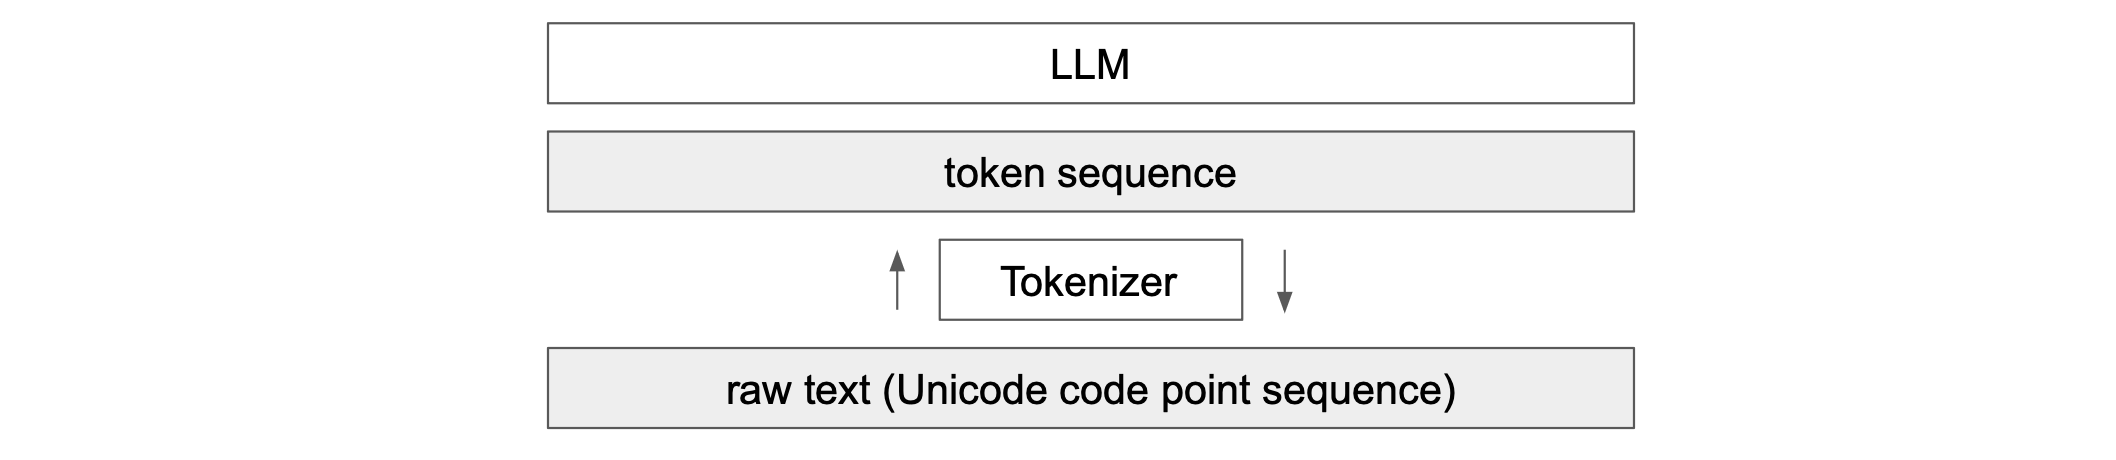

In [51]:
vocab = {idx: bytes([idx]) for idx in range(256)}
for (p0, p1), idx in merges.items():
    vocab[idx] = vocab[p0] + vocab[p1]

def decode(ids):
  # given ids (list of integers), return Python string
  tokens = b"".join(vocab[idx] for idx in ids)
  text = tokens.decode("utf-8", errors="replace")
  return text

print(decode([146]))

�


In [52]:
merges

{(224, 176): 256,
 (224, 177): 257,
 (32, 256): 258,
 (256, 191): 259,
 (257, 129): 260,
 (256, 190): 261,
 (257, 141): 262,
 (262, 256): 263,
 (261, 256): 264,
 (259, 256): 265,
 (194, 160): 266,
 (260, 256): 267,
 (130, 256): 268,
 (256, 168): 269,
 (257, 135): 270,
 (256, 178): 271,
 (260, 258): 272,
 (259, 258): 273,
 (264, 161): 274,
 (256, 268): 275,
 (257, 134): 276,
 (257, 139): 277,
 (256, 149): 278,
 (263, 168): 279,
 (32, 266): 280,
 (130, 258): 281,
 (266, 280): 282,
 (10, 266): 283,
 (283, 282): 284,
 (256, 161): 285,
 (257, 128): 286,
 (256, 166): 287,
 (258, 181): 288,
 (258, 133): 289,
 (256, 174): 290,
 (265, 149): 291,
 (259, 46): 292,
 (284, 34): 293,
 (256, 281): 294,
 (168, 279): 295,
 (276, 256): 296,
 (256, 164): 297,
 (265, 268): 298,
 (256, 176): 299,
 (293, 256): 300,
 (263, 164): 301,
 (174, 269): 302,
 (274, 272): 303,
 (260, 46): 304,
 (166, 292): 305,
 (159, 263): 306,
 (256, 184): 307,
 (256, 175): 308,
 (289, 269): 309,
 (270, 258): 310,
 (276, 271): 311

In [53]:
def encode(text):
  # given a string, return list of integers (the tokens)
  tokens = list(text.encode("utf-8"))
  while len(tokens) >= 2:
    stats = get_stats(tokens)
    pair = min(stats, key=lambda p: merges.get(p, float("inf")))
    if pair not in merges:
      break # nothing else can be merged
    idx = merges[pair]
    tokens = merge(tokens, pair, idx)
  return tokens

print(encode("నేను తెలుగు నేర్చుకుందాం అనుకుంటున్నాను"))

[269, 388, 409, 151, 272, 168, 270, 299, 346, 335, 317, 166, 264, 281, 351, 512, 318, 363, 260]


In [54]:
print(encode("తెలుగు నేర్చుకుందాం"))

[297, 311, 267, 151, 272, 168, 270, 299, 346, 335, 317, 166, 264, 130]


In [55]:
text2 = decode(encode(text))
print(text2 == text)

True


In [56]:
import regex as re
pat = re.compile(r"""| ?\p{L}+""")
print(re.findall(pat, "భారతదేశం నా మాతృభూమి !"))

['', 'భ', '', '', 'రతద', '', '', 'శ', '', '', ' న', '', '', ' మ', '', '', 'త', '', '', 'భ', '', '', 'మ', '', '', '', '']


In [57]:
import regex as re
pat = re.compile(r"""'s|'ve| ?\p{L}+| ?\p{N}+|""")
print(re.findall(pat, "భారతదేశం నా మాతృభూమి !"))

['భ', '', 'రతద', '', 'శ', '', ' న', '', ' మ', '', 'త', '', 'భ', '', 'మ', '', '', '', '']


In [58]:
import regex as re
gpt2pat = re.compile(r"""'s|'t|'re|'ve|'m|'ll|'d| ?\p{L}+| ?\p{N}+| ?[^\s\p{L}\p{N}]+|\s+(?!\S)|\s+""")

print(re.findall(gpt2pat, "అమెరికాలో(USA) 123,000,000 మంది తెలుగు వాళ్ళు ఉన్నారు!!! "))

['అమ', 'ె', 'ర', 'ి', 'క', 'ా', 'ల', 'ో(', 'USA', ')', ' 123', ',', '000', ',', '000', ' మ', 'ం', 'ద', 'ి', ' త', 'ె', 'ల', 'ు', 'గ', 'ు', ' వ', 'ా', 'ళ', '్', 'ళ', 'ు', ' ఉన', '్', 'న', 'ా', 'ర', 'ు!!!', ' ']


In [60]:
!pip install tiktoken

In [61]:
import tiktoken

# GPT-2 (does not merge spaces)
enc = tiktoken.get_encoding("gpt2")
print(enc.encode("    hello world!!!"))

# GPT-4 (merges spaces)
enc = tiktoken.get_encoding("cl100k_base")
print(enc.encode("    hello world!!!"))

[220, 220, 220, 23748, 995, 10185]
[262, 24748, 1917, 12340]


In [ ]:
pat = re.compile(r"""'(?:[sdmt]|ll|ve|re)| ?\p{L}+| ?\p{N}+| ?[^\s\p{L}\p{N}]+|\s+(?!\S)|\s+""")
print(re.findall(pat, "Tiger's dead. I've killed it!"))

['Tiger', "'s", ' dead', '.', ' I', "'ve", ' killed', ' it', '!']


In [ ]:
pat = re.compile(r"""'(?i:[sdmt]|ll|ve|re)|[^\r\n\p{L}\p{N}]?+\p{L}+|\p{N}{1,3}| ?[^\s\p{L}\p{N}]++[\r\n]*|\s*[\r\n]|\s+(?!\S)|\s+""")
print(re.findall(pat, "Tiger's dead. I'VE killed it!"))

['Tiger', "'s", ' dead', '.', ' I', "'VE", ' killed', ' it', '!']


In [ ]:
!wget https://openaipublic.blob.core.windows.net/gpt-2/models/1558M/vocab.bpe
!wget https://openaipublic.blob.core.windows.net/gpt-2/models/1558M/encoder.json

--2025-01-04 04:42:30--  https://openaipublic.blob.core.windows.net/gpt-2/models/1558M/vocab.bpe
Resolving openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)... 57.150.97.129
Connecting to openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)|57.150.97.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 456318 (446K) [application/octet-stream]
Saving to: ‘vocab.bpe’

vocab.bpe           100%[===================>] 445.62K  1.54MB/s    in 0.3s    

2025-01-04 04:42:31 (1.54 MB/s) - ‘vocab.bpe’ saved [456318/456318]

--2025-01-04 04:42:31--  https://openaipublic.blob.core.windows.net/gpt-2/models/1558M/encoder.json
Resolving openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)... 57.150.97.129
Connecting to openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)|57.150.97.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1042301 (1018K) [application/json]
Saving 

In [ ]:
import os, json

with open('encoder.json', 'r') as f:
    encoder = json.load(f) # <--- ~equivalent to our "vocab"

with open('vocab.bpe', 'r', encoding="utf-8") as f:
    bpe_data = f.read()
bpe_merges = [tuple(merge_str.split()) for merge_str in bpe_data.split('\n')[1:-1]]
# ^---- ~equivalent to our "merges"


In [ ]:
len(encoder)

50257

In [ ]:
type(encoder)

dict

In [ ]:
encoder['<|endoftext|>'] # the only special token in use for the GPT-2 base model

50256

In [ ]:
cl100k_base = tiktoken.get_encoding("cl100k_base")

# In production, load the arguments directly instead of accessing private attributes
# See openai_public.py for examples of arguments for specific encodings
enc = tiktoken.Encoding(
    # If you're changing the set of special tokens, make sure to use a different name
    # It should be clear from the name what behaviour to expect.
    name="cl100k_im",
    pat_str=cl100k_base._pat_str,
    mergeable_ranks=cl100k_base._mergeable_ranks,
    special_tokens={
        **cl100k_base._special_tokens,
        "<|im_start|>": 100264,
        "<|im_end|>": 100265,
    }
)

### sentencepiece

Commonly used because (unlike tiktoken) it can efficiently both train and inference BPE tokenizers. It is used in both Llama and Mistral series.

[sentencepiece on Github link](https://github.com/google/sentencepiece).

**The big difference**: sentencepiece runs BPE on the Unicode code points directly! It then has an option `character_coverage` for what to do with very very rare codepoints that appear very few times, and it either maps them onto an UNK token, or if `byte_fallback` is turned on, it encodes them with utf-8 and then encodes the raw bytes instead.

TLDR:

- tiktoken encodes to utf-8 and then BPEs bytes
- sentencepiece BPEs the code points and optionally falls back to utf-8 bytes for rare code points (rarity is determined by character_coverage hyperparameter), which then get translated to byte tokens.

(Personally I think the tiktoken way is a lot cleaner...)

In [ ]:
import sentencepiece as spm

In [ ]:
# write a toy.txt file with some random text
with open("toy.txt", "w", encoding="utf-8") as f:
  f.write("SentencePiece is an unsupervised text tokenizer and detokenizer mainly for Neural Network-based text generation systems where the vocabulary size is predetermined prior to the neural model training. SentencePiece implements subword units (e.g., byte-pair-encoding (BPE) [Sennrich et al.]) and unigram language model [Kudo.]) with the extension of direct training from raw sentences. SentencePiece allows us to make a purely end-to-end system that does not depend on language-specific pre/postprocessing.")

In [ ]:
# train a sentencepiece model on it
# the settings here are (best effort) those used for training Llama 2
import os

options = dict(
  # input spec
  input="toy.txt",
  input_format="text",
  # output spec
  model_prefix="tok400", # output filename prefix
  # algorithm spec
  # BPE alg
  model_type="bpe",
  vocab_size=400,
  # normalization
  normalization_rule_name="identity", # ew, turn off normalization
  remove_extra_whitespaces=False,
  input_sentence_size=200000000, # max number of training sentences
  max_sentence_length=4192, # max number of bytes per sentence
  seed_sentencepiece_size=1000000,
  shuffle_input_sentence=True,
  # rare word treatment
  character_coverage=0.99995,
  byte_fallback=True,
  # merge rules
  split_digits=True,
  split_by_unicode_script=True,
  split_by_whitespace=True,
  split_by_number=True,
  max_sentencepiece_length=16,
  add_dummy_prefix=True,
  allow_whitespace_only_pieces=True,
  # special tokens
  unk_id=0, # the UNK token MUST exist
  bos_id=1, # the others are optional, set to -1 to turn off
  eos_id=2,
  pad_id=-1,
  # systems
  num_threads=os.cpu_count(), # use ~all system resources
)

spm.SentencePieceTrainer.train(**options)


In [ ]:
sp = spm.SentencePieceProcessor()
sp.load('tok400.model')
vocab = [[sp.id_to_piece(idx), idx] for idx in range(sp.get_piece_size())]
vocab

[['<unk>', 0],
 ['<s>', 1],
 ['</s>', 2],
 ['<0x00>', 3],
 ['<0x01>', 4],
 ['<0x02>', 5],
 ['<0x03>', 6],
 ['<0x04>', 7],
 ['<0x05>', 8],
 ['<0x06>', 9],
 ['<0x07>', 10],
 ['<0x08>', 11],
 ['<0x09>', 12],
 ['<0x0A>', 13],
 ['<0x0B>', 14],
 ['<0x0C>', 15],
 ['<0x0D>', 16],
 ['<0x0E>', 17],
 ['<0x0F>', 18],
 ['<0x10>', 19],
 ['<0x11>', 20],
 ['<0x12>', 21],
 ['<0x13>', 22],
 ['<0x14>', 23],
 ['<0x15>', 24],
 ['<0x16>', 25],
 ['<0x17>', 26],
 ['<0x18>', 27],
 ['<0x19>', 28],
 ['<0x1A>', 29],
 ['<0x1B>', 30],
 ['<0x1C>', 31],
 ['<0x1D>', 32],
 ['<0x1E>', 33],
 ['<0x1F>', 34],
 ['<0x20>', 35],
 ['<0x21>', 36],
 ['<0x22>', 37],
 ['<0x23>', 38],
 ['<0x24>', 39],
 ['<0x25>', 40],
 ['<0x26>', 41],
 ['<0x27>', 42],
 ['<0x28>', 43],
 ['<0x29>', 44],
 ['<0x2A>', 45],
 ['<0x2B>', 46],
 ['<0x2C>', 47],
 ['<0x2D>', 48],
 ['<0x2E>', 49],
 ['<0x2F>', 50],
 ['<0x30>', 51],
 ['<0x31>', 52],
 ['<0x32>', 53],
 ['<0x33>', 54],
 ['<0x34>', 55],
 ['<0x35>', 56],
 ['<0x36>', 57],
 ['<0x37>', 58],
 ['<0x38>', 5

In [ ]:
ids = sp.encode("hello इस वाक्य का")
print(ids)

[362, 378, 361, 372, 358, 362, 227, 167, 138, 227, 167, 187, 362, 227, 167, 184, 227, 167, 193, 227, 167, 152, 227, 168, 144, 227, 167, 178, 362, 227, 167, 152, 227, 167, 193]


In [ ]:
print([sp.id_to_piece(idx) for idx in ids])

['▁', 'h', 'e', 'l', 'lo', '▁', '<0xE0>', '<0xA4>', '<0x87>', '<0xE0>', '<0xA4>', '<0xB8>', '▁', '<0xE0>', '<0xA4>', '<0xB5>', '<0xE0>', '<0xA4>', '<0xBE>', '<0xE0>', '<0xA4>', '<0x95>', '<0xE0>', '<0xA5>', '<0x8D>', '<0xE0>', '<0xA4>', '<0xAF>', '▁', '<0xE0>', '<0xA4>', '<0x95>', '<0xE0>', '<0xA4>', '<0xBE>']
